We first import all the required libraries:

<b>cv2 - </b>To capture an image using the webcam & convert it to RGB<br>
<b>Mediapipe - </b>For face & gesture recognition; open-sourced library by Google<br>
<b> Python-math - </b>To find the distance between point number 4 (th thumb) & point number 8 (the index number) using hypotenuse.<br>
<b> Pycaw - </b>To access device's speaker & its master volume<br>It depends on two libraries:<br>
<b> ● ctypes - </b> provides C language compatible data types<br><b>  ● comtypes - </b> bases on th ectypes FFI (Foreign function Interface) library<br>

In [1]:
import cv2
import mediapipe as mp
from math import hypot
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
import numpy as np

Now, we get the video input from our computer's primary camera.

Note- if using any other camera, replace the number 0 with that.

In [2]:
cap = cv2.VideoCapture(0)

## Detecting, initializing, and configuring the hands

We call the <b>mediapipe hand module</b> to detect the hands from the video input we received. 

In [3]:
mpHands = mp.solutions.hands

Now we complete the initialization & configuration of the detected hands.

In [4]:
hands = mpHands.Hands()

Finally, we draw the <i>connections & landmarks</i> on detected hand

In [5]:
mpDraw = mp.solutions.drawing_utils

## Accessing the speaker using pycaw

Initializations we need for pycaw to run smoothly

In [6]:
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

## Finding the volume range between the minimum and maximum volume

The code finds the volume range between the minimum and maximum volume. We place it outside the while loop because we need to find the volume range once.

In [7]:
volMin, volMax = volume.GetVolumeRange()[:2]

## Capturing an image from our camera and converting it to an RGB image

(line 2-4):<br>The code checks whether the camera we have specified works.<br>
If it works, we capture the image.<br>
Then convert the image to RGB and complete processing of the image.

## Checking whether we have multiple hands in our input

(line 5-6):<br>We create an empty list that will store the list of elements of the hands detected by the mediapipe hand module, i.e., the number of points on the hand.<br>It also checks whether the input has multiple hands.

## Creating a for loop to manipulate each hand

(line 7-12):<br>
We use <b>firs for loop</b> to interact with each hand in the results.<br>
We use the <b>second for loop</b> to get the <i>id (id number)</i> and <i>lm (landmark information)</i> for each hand landmark.<br>

id number - number assigned to various hand points<br>
landmark info - gives us x and y coordinates

<b>h, w, c = img.shape:</b>
    checks height, width and channels of our image.
    
<b>cx, cy = int(lm.x * w), int(lm.y * h):</b> find the central position of our image.<br>
This is achieved by multiplying <i>lm.x by width</i> and assigning the value obtained to cx.<br>
Then multiplying <i>lm.x by height</i> and assigning the value obtained to cy.

<b>lmList.append([id, cx, cy]):</b>To add the values of id,cx and cy to lmList.

Finally call <b>mpDraw.draw_landmarks</b>to draw all the landmarks of the hand using the last line of code.

## Specifying the points of the thumb and middle finger we will use

(line 13-15):<br>We specify the number of elements in lmlist. It should not be null.<br>
We assign variables x1 and y1 the x and y coordinates of point 4 respectively. This is the tip of the thumb.<br>
We then repeat the same for the index finger in the last line.

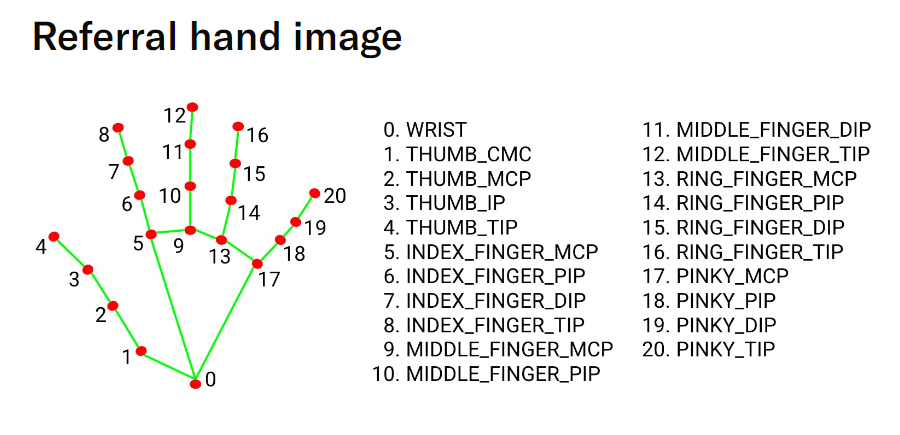

## Drawing a circle at the tip of the thumb and the tip of the index finger

(line 16-17):<br><b>(x1, y1)</b> specifies that we will draw the circle at the tip of the thumb.<br>    ● <b>15</b> is the radius of the circle. <br><b>●   (255, 0, 0)</b> is the color of the circle. <br><b>●  cv2.FILLED </b>refers to the thickness of -1 pixels which will fill the circle with the color we specify.

We repeat the same for the index finger:

## Drawing a line between points 4 and 8

(line 18): <br><b>cv2.line function</b> to draw a line between point 4 of the hand and point 8.<br>The line will connect point 4 (x1, y1) - <i>tip of the thumb</i> and point 8 (x2, y2) - <i> tip of index finger</i><br>

(255, 0, 0) is the line colour and 3 is the thickness.

## Finding the distance between points 4 and 8

(line 19): <br>We find the distance between the tip of the thumb and the index finger using a hypotenuse. <br>
We achieve this by calling the <b>math hypot function</b> then passing the <i>difference between x2 and x1 </i>and the <i>difference between y2 and y1.</i>

## Converting the hand range to the volume range

(line 20 - 21): <br><b>NumPy function - <i>np.intep</i></b> is called to convert the hand range to the volume range.
    
The arguments used are:<br>
    ● <b>length: </b> the value we want to convert<br>
    ● <b>[15 - 220]: </b> hand range<br>
    ● <b>[volMin, volMax]: </b> giving range to which we want to convert

## Setting the master volume

(line 22): <br>We set the master volume level following the hand range.<br>
We achieve this by passing <i>vol</i> - the value of hand range we converted to volume range

## Displaying the video output used to interact with the user

(line 23): <br>Shows the real-time video of the user interacting with the program, i.e., the user uses the thumb and the index finger to control the volume.

## Terminating the program

(line 24- 25):<br>The program terminates once we press the <b> q key</b>

In [8]:
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    lmlist = []
    if results.multi_hand_landmarks:
        for handlandmark in results.multi_hand_landmarks:
            for id, lm in enumerate(handlandmark.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmlist.append([id, cx, cy]) 
            mpDraw.draw_landmarks(img, handlandmark, mpHands.HAND_CONNECTIONS)
        if lmlist != []:
            x1, y1 = lmlist[4][1], lmlist[4][2]
            x2, y2 = lmlist[8][1], lmlist[8][2]
            cv2.circle(img, (x1, y1), 15, (255, 0, 0), cv2.FILLED)  
            cv2.circle(img, (x2, y2), 15, (255, 0, 0), cv2.FILLED)  
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
            length = hypot(x2 - x1, y2 - y1)
        vol = np.interp(length, [15, 220], [volMin, volMax])
        print(vol, length)
        volume.SetMasterVolumeLevel(vol, None) 
    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xff == ord('q'): 
        cap.release()
        cv2.destroyAllWindows()

-59.834052280670896 32.01562118716424
-59.44385120445559 33.24154027718932
-59.04906036942219 34.48187929913333
-59.146414743766464 34.17601498127012
-57.94603215652761 37.94733192202055
-58.438361700596246 36.40054944640259
-57.13451900762529 40.496913462633174
-53.938796299625636 50.537115073973105
-47.997708671981734 69.20260110718382
-20.05142536370635 157.00318468107582
-13.881133762254805 176.3887751530692
-8.488445125281892 193.33132182861627
-10.480684621573651 187.0721785835617
0.0 226.27416997969522
0.0 249.61570463414355
0.0 247.95160818191923
0.0 255.16269319788893
0.0 265.2168923730161
0.0 266.5970742525131
0.0 277.72108310317384
0.0 281.44093518889537
0.0 280.2641611051973
0.0 281.44093518889537
0.0 283.8679270365006
0.0 281.774732721016
0.0 281.32543432828817
0.0 276.87542325024083
0.0 275.42875666858026
0.0 271.28029784707917
0.0 228.43160902116853
0.0 232.26278221015093
-23.553658536585367 146.0
-27.03602039810798 135.05924625881784
-38.270008827421236 99.7647232241938

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
